# Score Predictions

Evaluate the score prediction models performance from [source](https://journals.sagepub.com/doi/full/10.1177/1471082X18817650). 

In [1]:
%load_ext autoreload


In [2]:
import pandas as pd
import numpy as np

from ranked_probability_score import ranked_probability_score, match_outcome


In [3]:
outcome = pd.read_csv("../data/fivethirtyeight/spi_matches.csv")
outcome = (outcome
           .loc[(outcome['league_id'] == 2411) | (outcome['league_id'] == 2412)]
           .dropna()
           )


## Poisson

In [4]:
predictions_poisson = (
    pd.merge(
        pd.read_csv("../data/predictions/scores/poisson.csv"),
        outcome.loc[:, ['team1', 'team2', 'date', 'score1', 'score2']],
        how='left',
        left_on=['team1', 'team2', 'date'],
        right_on=['team1', 'team2', 'date'])
).dropna()

predictions_poisson["winner"] = match_outcome(predictions_poisson)
predictions_poisson["rps"] = (
    predictions_poisson.apply(
        lambda row: ranked_probability_score(
            [row["home_win_p"], row["draw_p"], row["away_win_p"]], row["winner"]
        ), axis=1))

f"{(np.mean(predictions_poisson['rps'])*100):.2f}"


'21.44'

## Time Decayed Poisson

In [5]:
predictions_poisson_decay = (
    pd.merge(
        pd.read_csv("../data/predictions/scores/poisson_decay.csv"),
        outcome.loc[:, ['team1', 'team2', 'date', 'score1', 'score2']],
        how='left',
        left_on=['team1', 'team2', 'date'],
        right_on=['team1', 'team2', 'date'])
).dropna()

predictions_poisson_decay["winner"] = match_outcome(predictions_poisson_decay)
predictions_poisson_decay["rps"] = (
    predictions_poisson_decay.apply(
        lambda row: ranked_probability_score(
            [row["home_win_p"], row["draw_p"], row["away_win_p"]], row["winner"]
        ), axis=1))

f"{(np.mean(predictions_poisson_decay['rps'])*100):.2f}"


'21.21'

## Dixon and Coles

In [6]:
predictions_dixon_coles = (
    pd.merge(
        pd.read_csv("../data/predictions/scores/dixon_coles.csv"),
        outcome.loc[:, ['team1', 'team2', 'date', 'score1', 'score2']],
        how='left',
        left_on=['team1', 'team2', 'date'],
        right_on=['team1', 'team2', 'date'])
).dropna()

predictions_dixon_coles["winner"] = match_outcome(predictions_dixon_coles)
predictions_dixon_coles["rps"] = (
    predictions_dixon_coles.apply(
        lambda row: ranked_probability_score(
            [row["home_win_p"], row["draw_p"], row["away_win_p"]], row["winner"]
        ), axis=1))

f"{(np.mean(predictions_dixon_coles['rps'])*100):.2f}"


'18.92'

## Bayesian

In [7]:
predictions_bayesian = (
    pd.merge(
        pd.read_csv("../data/predictions/scores/bayesian.csv"),
        outcome.loc[:, ['team1', 'team2', 'date', 'score1', 'score2']],
        how='left',
        left_on=['team1', 'team2', 'date'],
        right_on=['team1', 'team2', 'date'])
).dropna()

predictions_bayesian["winner"] = match_outcome(predictions_bayesian)
predictions_bayesian["rps"] = (
    predictions_bayesian.apply(
        lambda row: ranked_probability_score(
            [row["home_win_p"], row["draw_p"], row["away_win_p"]], row["winner"]
        ), axis=1))

f"{(np.mean(predictions_bayesian['rps'])*100):.2f}"


'19.24'

## Bayesian Decay

In [8]:
predictions_bayesian_decay = (
    pd.merge(
        pd.read_csv("../data/predictions/scores/bayesian_decay.csv"),
        outcome.loc[:, ['team1', 'team2', 'date', 'score1', 'score2']],
        how='left',
        left_on=['team1', 'team2', 'date'],
        right_on=['team1', 'team2', 'date'])
).dropna()

predictions_bayesian_decay["winner"] = match_outcome(
    predictions_bayesian_decay)
predictions_bayesian_decay["rps"] = (
    predictions_bayesian_decay.apply(
        lambda row: ranked_probability_score(
            [row["home_win_p"], row["draw_p"], row["away_win_p"]], row["winner"]
        ), axis=1))

f"{(np.mean(predictions_bayesian_decay['rps'])*100):.2f}"


'19.60'

## Bayesian XG

In [9]:
predictions_bayesian_xg = (
    pd.merge(
        pd.read_csv("../data/predictions/scores/bayesian_xg.csv"),
        outcome.loc[:, ['team1', 'team2', 'date', 'score1', 'score2']],
        how='left',
        left_on=['team1', 'team2', 'date'],
        right_on=['team1', 'team2', 'date'])
).dropna()

predictions_bayesian_xg["winner"] = match_outcome(predictions_bayesian_xg)
predictions_bayesian_xg["rps"] = (
    predictions_bayesian_xg.apply(
        lambda row: ranked_probability_score(
            [row["home_win_p"], row["draw_p"], row["away_win_p"]], row["winner"]
        ), axis=1))

f"{(np.mean(predictions_bayesian_xg['rps'])*100):.2f}"


'19.58'

## Soccer Performance Index

In [10]:
from spi import SPI

df = pd.read_csv("../data/fivethirtyeight/spi_matches.csv")
df = (df
      .loc[df['league_id'] == 2411]
      )
df = df[df['season'] == 2021]
df = df[df['score1'].notna()]

spi = SPI(df)
predictions_spi = spi.evaluate()

In [11]:
f"{(np.mean(predictions_spi['rps'])*100):.2f}"

'18.68'

## Betting Odds

In [12]:
predictions_market = (
    pd.read_csv('../data/betting/2021-22.csv')
    .loc[:, ["HomeTeam", "AwayTeam", "FTHG", "FTAG", "B365H", "B365D", "B365A"]]
    .rename(columns={
        "HomeTeam": "team1",
        "AwayTeam": "team2",
        "FTHG": "score1",
        "FTAG": "score2",
        "B365H": "home_win_p",
        "B365D": "draw_p",
        "B365A": "away_win_p"})
)

predictions_market = predictions_market.replace({
    'Brighton': 'Brighton and Hove Albion',
    'Leicester': 'Leicester City',
    'Leeds': 'Leeds United',
    'Man City': 'Manchester City',
    'Man United': 'Manchester United',
    'Norwich': 'Norwich City',
    'Tottenham': 'Tottenham Hotspur',
    'West Ham': 'West Ham United',
    'Wolves': 'Wolverhampton'
})

predictions_market['total'] = (100 / predictions_market['home_win_p'] + 100 /
               predictions_market['draw_p'] + 100 / predictions_market['away_win_p'])
predictions_market['home_win_p'] = 100 / predictions_market['home_win_p'] / predictions_market['total']
predictions_market['away_win_p'] = 100 / predictions_market['away_win_p'] / predictions_market['total']
predictions_market['draw_p'] = 100 / predictions_market['draw_p'] / predictions_market['total']

In [13]:
predictions_market["winner"] = match_outcome(predictions_market)

predictions_market["rps"] = predictions_market.apply(
    lambda row: ranked_probability_score(
        [row["home_win_p"], row["draw_p"],
            row["away_win_p"]], int(row["winner"])
    ), axis=1)

f"{(np.mean(predictions_market['rps'])*100):.2f}"

0.1824076416800692

# Comparison

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from highlight_text import fig_text

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6

In [15]:
predictions_spi = (
    pd.merge(
        pd.read_csv("../data/predictions/scores/bayesian_decay.csv").loc[:, ['team1', 'team2', 'event']],
        predictions_spi,
        how='left',
        left_on=['team1', 'team2'],
        right_on=['team1', 'team2'])
)

In [16]:
predictions_market = (
    pd.merge(
        pd.read_csv("../data/predictions/scores/bayesian_decay.csv").loc[:, ['team1', 'team2', 'event']],
        predictions_market,
        how='left',
        left_on=['team1', 'team2'],
        right_on=['team1', 'team2'])
)

Text(0.8, 0.01, 'Created by Paul Fournier')

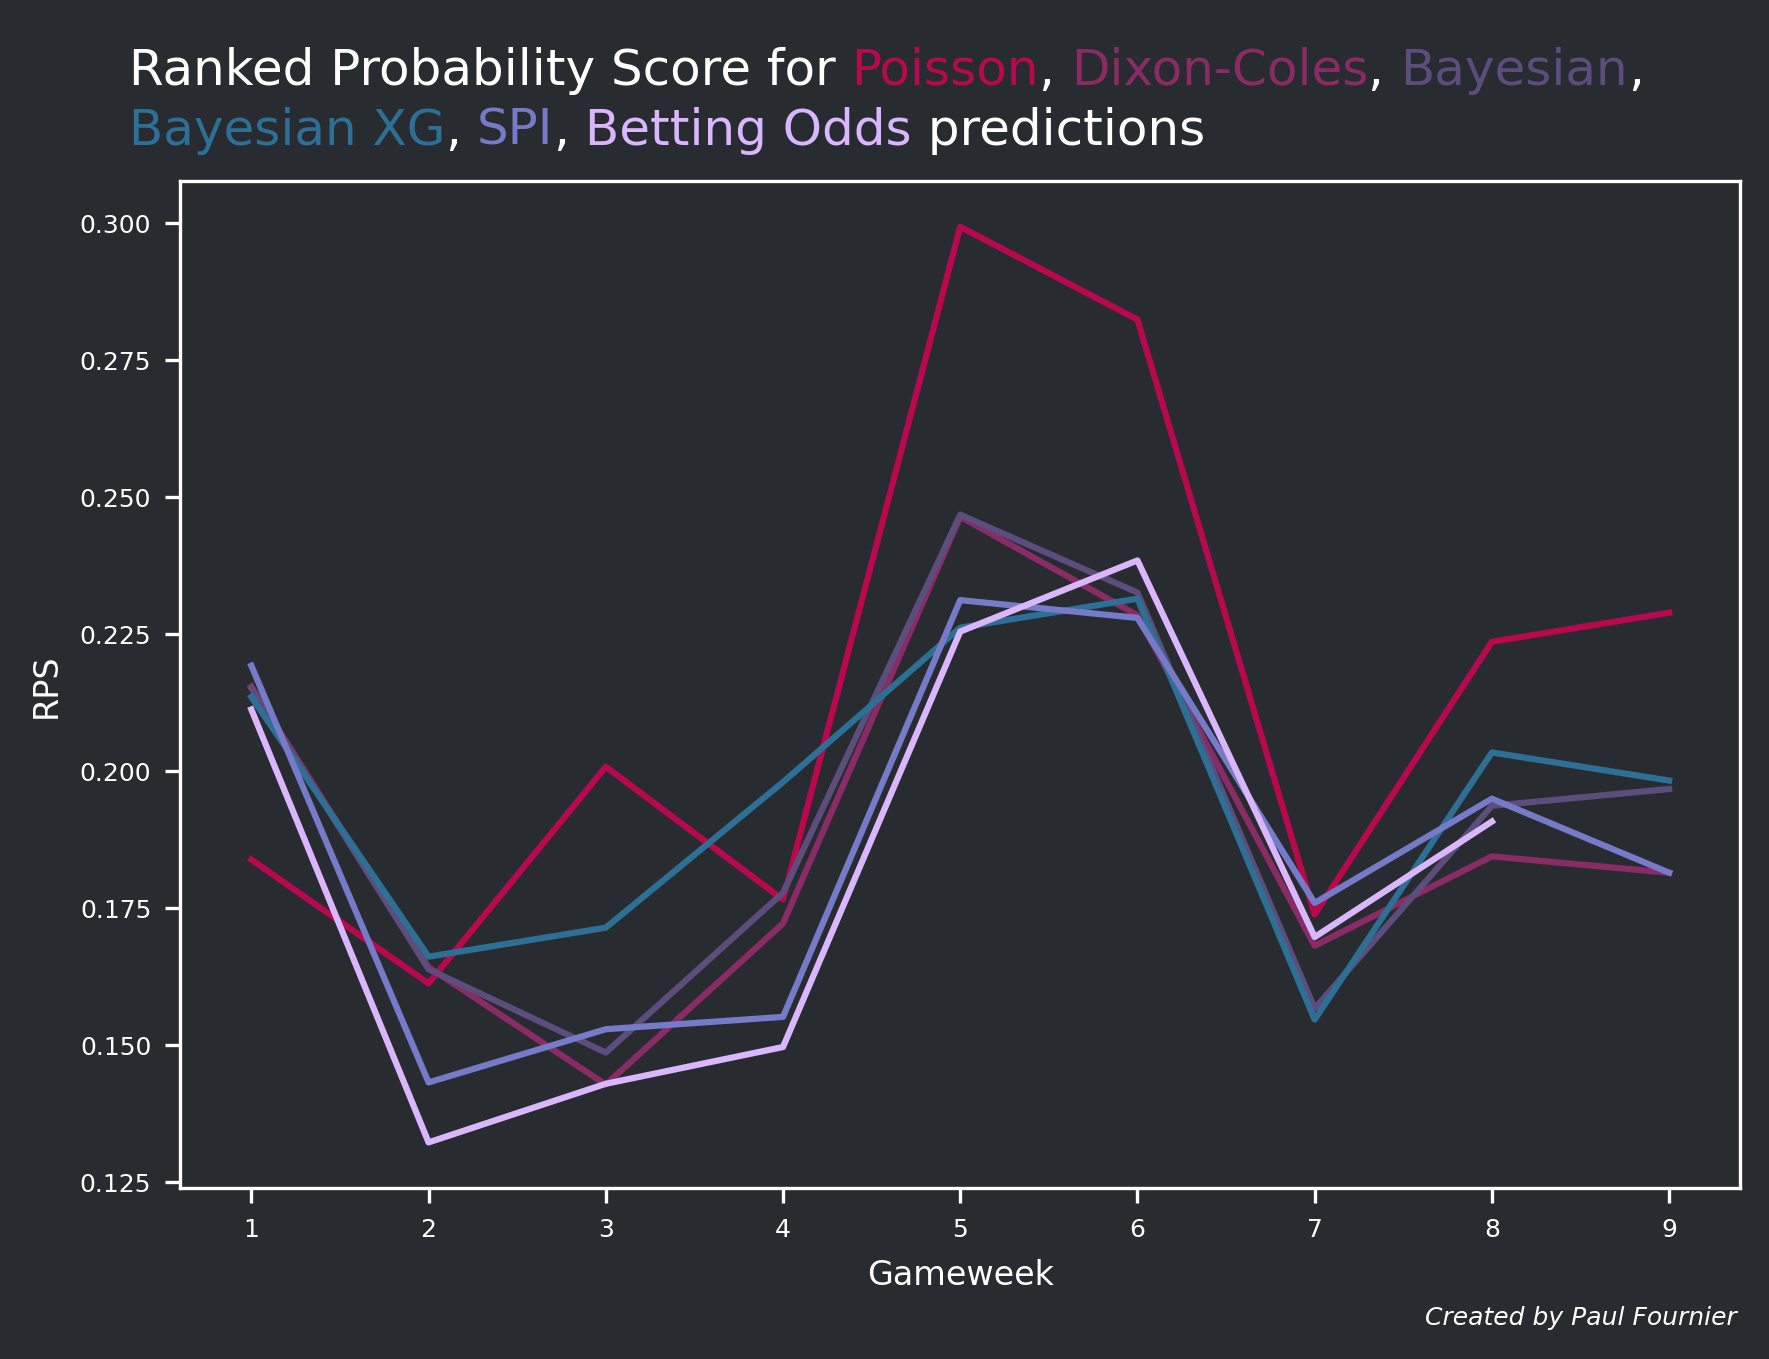

In [51]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.plot(
    predictions_poisson.groupby('event').mean()['rps'],
    color='#b7094c')
ax.plot(
    predictions_dixon_coles.groupby('event').mean()['rps'],
    color='#892b64')
ax.plot(
    predictions_bayesian.groupby('event').mean()['rps'],
    color='#5c4d7d')
ax.plot(
    predictions_bayesian_xg.groupby('event').mean()['rps'],
    color='#2e6f95')
ax.plot(
    predictions_spi.groupby('event').mean()['rps'],
    color='#757bc8')
ax.plot(
    predictions_market.groupby('event').mean()['rps'],
    color='#dab6fc')

ax.set_xlabel('Gameweek', fontsize=8, color=text_color)
ax.set_ylabel('RPS' , fontsize=8, color=text_color)

fig_text(x=0.08, y=1.075,
        s="Ranked Probability Score for <Poisson>, <Dixon-Coles>, <Bayesian>,",
        highlight_textprops=[
            {"color": '#b7094c'},
            {"color": '#892b64'},
            {"color": '#5c4d7d'},
            ],
        fontweight="regular", fontsize=12, fontfamily=title_font,
        color=text_color, alpha=1)

fig_text(x=0.08, y=1.025,
        s="<Bayesian XG>, <SPI>, <Betting Odds> predictions",
        highlight_textprops=[
            {"color": '#2e6f95'},
            {"color": '#757bc8'},
            {"color": '#dab6fc'},
            ],
        fontweight="regular", fontsize=12, fontfamily=title_font,
        color=text_color, alpha=1)

fig.text(
    0.8, 0.01, "Created by Paul Fournier",
    fontstyle="italic", fontsize=6, fontfamily=watermark_font, color=text_color)